In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from vgg16.vgg16_modified import vgg16_modified
from code_base.data_processing import data_handling as dh
from code_base.training_functions import optimize, train_nn
import os
from matplotlib import pyplot as plt

In [2]:
# FEAT_DIR = './data/train/images'
# LABELS_DIR = './data/train/masks'
# #VGG_PATH = '/home/paperspace/kaggle/Semantic_Segmentation/vgg16/saved_model_with_dropout'
# VGG_PATH = '/home/paperspace/kaggle/Semantic_Segmentation/vgg16/saved_model_no_weights'
# WEIGHT_PATH = './vgg16/vgg16_weights.npz'
NUM_CLASSES = 1
LRATE = 0.001
EPOCHS = 1
BATCH_SIZE = 64
IMAGE_SHAPE = (101, 101, 3)
LABEL_SHAPE = (101, 101)
INPUT_SHAPE = (104, 104, 3)
OUTPUT_SHAPE = (104, 104)

### Run

In [4]:
with tf.Session() as sess:
    
    d_processor = dh()
    image_input = tf.placeholder(tf.float32,
                          [None, *INPUT_SHAPE],
                          name='image_input'
                         )
    
    phase = tf.placeholder(tf.bool, name='phase') 
    # if no dropout will not be relevant
    
    vgg = vgg16_modified(image_input, sess)

    correct_label = tf.placeholder(tf.float32, 
                                   [None, *OUTPUT_SHAPE], 
                                   name='correct_label'
                                  )

    logits, train_op, cross_entropy_loss = optimize(vgg.output, correct_label)
    
    (input_train,
    train, 
    true_train, 
    input_test, 
    test, 
    true_test) \
    = train_nn(
        sess,
        EPOCHS,
        BATCH_SIZE,
        d_processor,
        train_op, 
        cross_entropy_loss,
        image_input,
        correct_label,
        phase
    )
    
    

0 conv1_1_W (3, 3, 3, 64)
1 conv1_1_b (64,)
2 conv1_2_W (3, 3, 64, 64)
3 conv1_2_b (64,)
4 conv2_1_W (3, 3, 64, 128)
5 conv2_1_b (128,)
6 conv2_2_W (3, 3, 128, 128)
7 conv2_2_b (128,)
8 conv3_1_W (3, 3, 128, 256)
9 conv3_1_b (256,)
10 conv3_2_W (3, 3, 256, 256)
11 conv3_2_b (256,)
12 conv3_3_W (3, 3, 256, 256)
13 conv3_3_b (256,)
EPOCH 1 ...
Loss = 252.719;  Val_loss = 461.709



### Evaluation

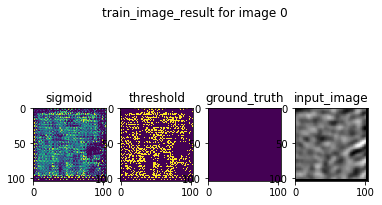

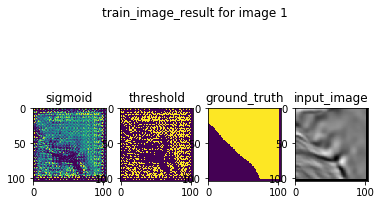

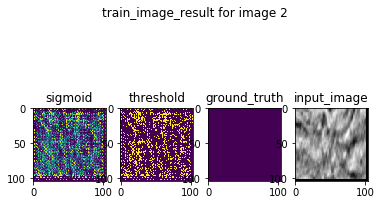

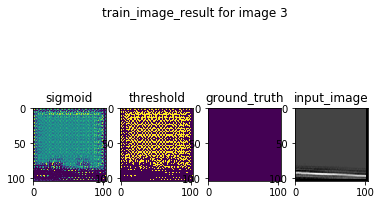

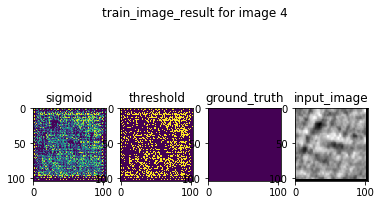

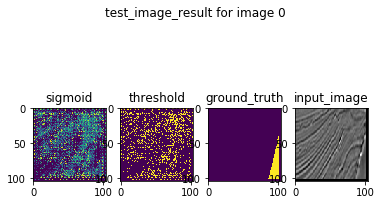

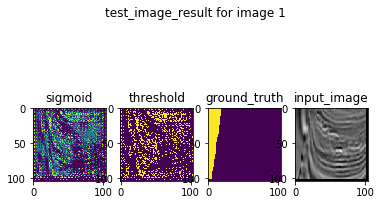

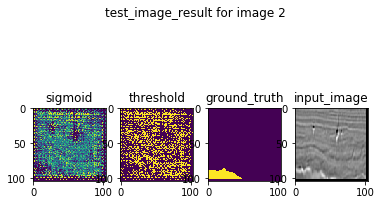

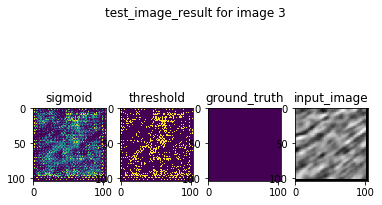

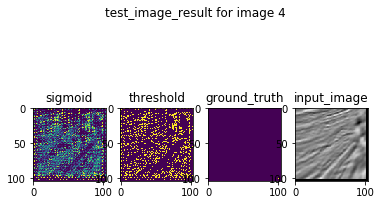

In [5]:
def proc_image(input_img, predict, true, ind, name):
    
    def softmax(x):
        return 1 / (1 + np.exp(-x))
    
    predict = np.array(predict)
    img = predict[0,ind,:,:,0]
    img = np.array(list(map(softmax, img))
                  )
    thresh_img = img > 0.5
    fig, ax = plt.subplots(1,4)
    ax[0].imshow(img)
    ax[0].set_title('sigmoid')
    ax[1].imshow(thresh_img)
    ax[1].set_title('threshold')
    ax[2].imshow(true[ind])
    ax[2].set_title('ground_truth')
    ax[3].imshow(input_img[ind])
    ax[3].set_title('input_image')
    fig.suptitle(name + ' for image ' + str(ind))
    
    return None

for i in range(5):
    proc_image(input_train, train, true_train, i, name = 'train_image_result')

for i in range(5):
    proc_image(input_test, test, true_test, i, name = 'test_image_result')